In [72]:
from joblib import load

best_clf = load("models/decision_tree_full_model.pkl")

In [73]:
DATA_DIR = 'data/raw/full/'

In [74]:
import pandas as pd

data = pd.read_csv(DATA_DIR + 'dataset_full.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [191]:
print(data["qty_dollar_directory"])

0        0
1        0
2        0
3        0
4       -1
        ..
88642   -1
88643   -1
88644    0
88645    0
88646   -1
Name: qty_dollar_directory, Length: 88647, dtype: int64


Text(0.5, 0, 'Length of directory in URL (log scale)')

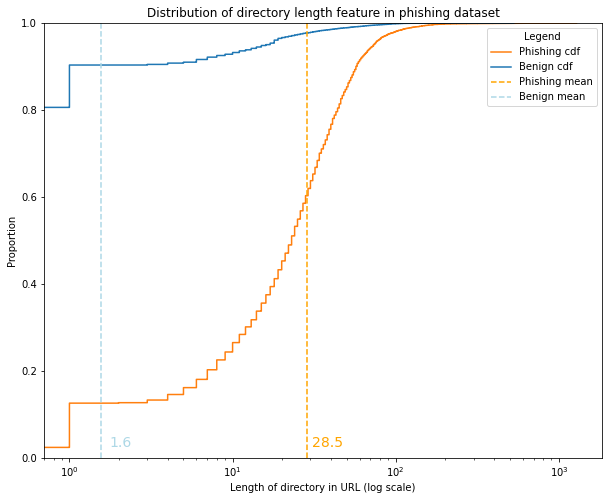

<Figure size 640x480 with 0 Axes>

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

f, ax1 = plt.subplots()
figure(figsize=(8, 6), dpi=80)


# Directory Length
sns.ecdfplot(data=data, x="directory_length", hue="phishing", ax=ax1)
ax1.set_xscale("log")

phishing_mean = data[data["phishing"] == 1].directory_length.mean()
benign_mean = data[data["phishing"] == 0].directory_length.mean()
avg_phishing = ax1.axvline(x=phishing_mean, color='orange', linestyle='--')
avg_benign = ax1.axvline(x=benign_mean, color='lightblue', linestyle='--')

ax1.text(phishing_mean + 2, 0.025, str(round(phishing_mean, 1)), color="orange", fontsize=14)
ax1.text(benign_mean + 0.2, 0.025, str(round(benign_mean, 1)), color="lightblue", fontsize=14)

ax1.legend(title='Legend', labels=['Phishing cdf', 'Benign cdf', 'Phishing mean', 'Benign mean'])

ax1.set_title("Distribution of directory length feature in phishing dataset")
ax1.set_xlabel("Length of directory in URL (log scale)")


In [2]:

import matplotlib.ticker as mticker

f, axs = plt.subplots(2, 2, figsize=(18, 10))
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

# Directory Length
sns.ecdfplot(data=data, x="directory_length", hue="phishing", ax=ax1)
ax1.set_xscale("log")

phishing_mean = data[data["phishing"] == 1].directory_length.mean()
benign_mean = data[data["phishing"] == 0].directory_length.mean()
avg_phishing = ax1.axvline(x=phishing_mean, color='orange', linestyle='--')
avg_benign = ax1.axvline(x=benign_mean, color='lightblue', linestyle='--')
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.ticklabel_format(style='plain', axis='x')

ax1.legend(title='Legend', labels=['Phishing cdf', 'Benign cdf', 'Phishing mean', 'Benign mean'])

ax1.set_title("Length of directory CDF")
ax1.set_xlabel("Length of directory (log scale)")


# $ in directory
sns.ecdfplot(data=data, x="qty_dollar_directory", hue="phishing", ax=ax2)

phishing_mean = data[data["phishing"] == 1].qty_dollar_directory.mean()
benign_mean = data[data["phishing"] == 0].qty_dollar_directory.mean()
avg_phishing = ax2.axvline(x=phishing_mean, color='orange', linestyle='--')
avg_benign = ax2.axvline(x=benign_mean, color='lightblue', linestyle='--')

ax2.legend(title='Legend', labels=['Phishing cdf', 'Benign cdf', 'Phishing mean', 'Benign mean'])

ax2.set_title("Number of '$' in directory CDF")
ax2.set_xlabel("Number of '$'")


# / in directory
sns.ecdfplot(data=data, x="qty_slash_directory", hue="phishing", ax=ax3)
# ax3.set_xscale("log")

phishing_mean = data[data["phishing"] == 1].qty_slash_directory.mean()
benign_mean = data[data["phishing"] == 0].qty_slash_directory.mean()
avg_phishing = ax3.axvline(x=phishing_mean, color='orange', linestyle='--')
avg_benign = ax3.axvline(x=benign_mean, color='lightblue', linestyle='--')

ax3.legend(title='Legend', labels=['Phishing cdf', 'Benign cdf', 'Phishing mean', 'Benign mean'])

ax3.set_title("Number of '/' in directory CDF")
ax3.set_xlabel("Number of '/'")


# _ in directory
sns.ecdfplot(data=data, x="qty_underline_directory", hue="phishing", ax=ax4)
ax4.set_xscale("log")

phishing_mean = data[data["phishing"] == 1].qty_underline_directory.mean()
benign_mean = data[data["phishing"] == 0].qty_underline_directory.mean()
avg_phishing = ax4.axvline(x=phishing_mean, color='orange', linestyle='--')
avg_benign = ax4.axvline(x=benign_mean, color='lightblue', linestyle='--')
ax4.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax4.ticklabel_format(style='plain', axis='x')

ax4.legend(title='Legend', labels=['Phishing cdf', 'Benign cdf', 'Phishing mean', 'Benign mean'])

ax4.set_title("Number of '_' in directory CDF")
ax4.set_xlabel("Number of '_' (log scale)")

f


NameError: name 'plt' is not defined